In [1]:
import os

# 查看当前工作目录
print("当前工作目录:", os.getcwd())

# 更改为目标路径（替换成你的路径）
os.chdir(r"C:\Users\Tor's lenovo\Desktop\Win_All\CDS524\GlucoNet")

# 再次查看当前目录，确认修改成功
print("修改后工作目录:", os.getcwd())


当前工作目录: c:\Users\Tor's lenovo\Desktop\Win_All\CDS524\GlucoNet
修改后工作目录: C:\Users\Tor's lenovo\Desktop\Win_All\CDS524\GlucoNet


In [2]:
import os
from sklearn import preprocessing
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn import model_selection

In [3]:
# save_dir = "pic"
# os.makedirs(save_dir, exist_ok=True)

Diabetes= pd.read_csv('diabetes_data_upload.csv') # loading the dataset

In [4]:
Diabetes.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
Diabetes.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
Diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


Polyuria              0.665922
Polydipsia            0.648734
Gender                0.449233
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
Alopecia              0.267512
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.106419
Obesity               0.072173
delayed healing       0.046980
Itching               0.013384
dtype: float64


<Axes: title={'center': 'Correlation with target variable class'}>

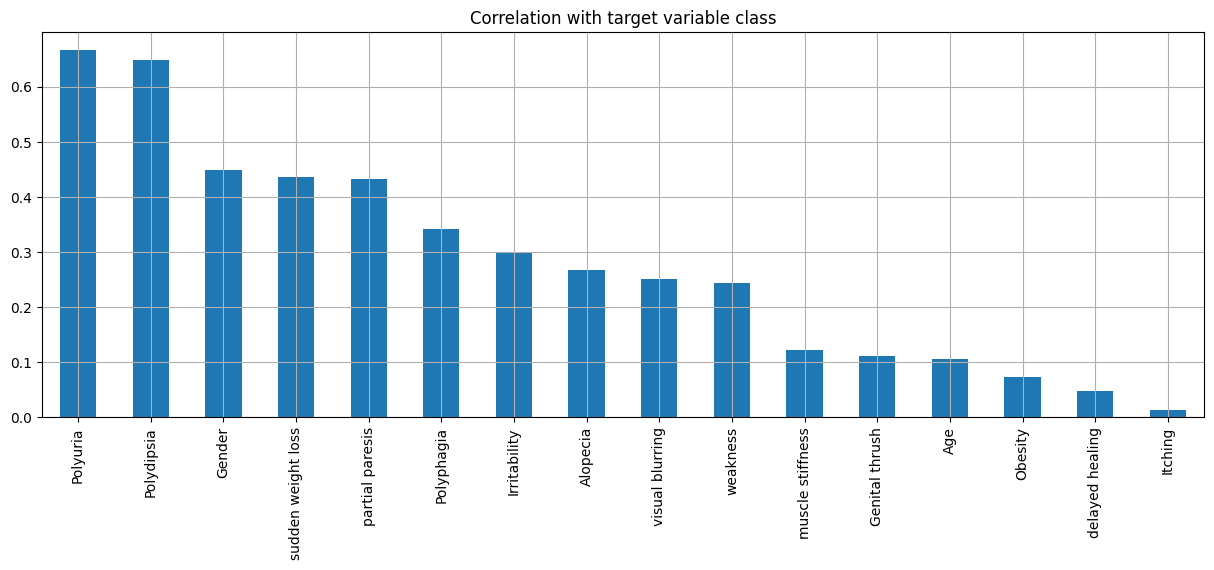

In [25]:
number = preprocessing.LabelEncoder()

dtacpy1 = Diabetes.copy()   # Duplicating the Dataset

#Encoding the categorical variable to nurmeric values (0's & 1's)
for i in dtacpy1:
    dtacpy1[i] = number.fit_transform(dtacpy1[i])

dtacpy1.head()

# Setting target variable
X = dtacpy1.drop(['class'],axis=1) # Independent
Y = dtacpy1['class'] # Dependent

correlation = X.corrwith(Y)
cor_abs=correlation.abs().sort_values(ascending=False)
print(cor_abs)

cor_abs.plot.bar(title="Correlation with target variable class", grid=True, figsize=(15,5))

In [7]:
gendis= px.histogram(Diabetes, x = 'Gender', color = 'class', title="Postive/Negative count Vs Gender")
gendis.show()

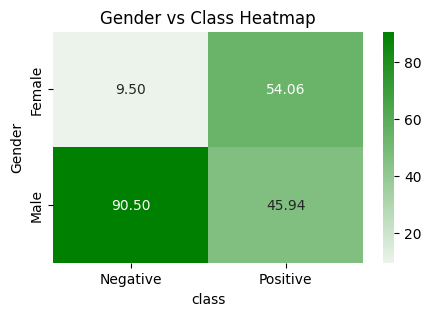

In [8]:
# 2. Crosstab Heatmap (Gender vs Class)
plt.figure(figsize=(5, 3))
cm = sns.light_palette("green", as_cmap=True)
sns.heatmap(pd.crosstab(Diabetes['Gender'], Diabetes['class'], normalize='columns') * 100, cmap=cm, annot=True, fmt=".2f")
plt.title("Gender vs Class Heatmap")
plt.show()
#plt.savefig(f"{save_dir}/gender_vs_class_heatmap.png")
plt.close()





In [9]:
agehist= px.histogram(Diabetes, x='Age', color="class", title="Distribution of Postive cases with Ages")
agehist.show()
#agehist.write_image(f"{save_dir}/age_distribution.png")

In [10]:
genbox = px.box(Diabetes, y="Age", x="class", color="Gender", points="all", title= "Age Vs Positive/Negative")
genbox.show()

In [11]:
clspi = px.pie(Diabetes, values='Age', names='class', title= "Ratio of Positive and Negative cases")
clspi.show()

In [12]:
polyuria=px.histogram(Diabetes, x = 'Polyuria', color = 'class', title="Polyuria")
polyuria.show()

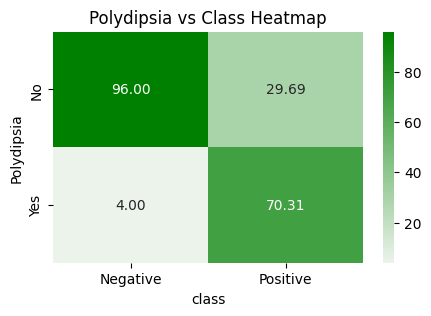

In [13]:
plt.figure(figsize=(5, 3))
rm = sns.light_palette("green", as_cmap=True)
sns.heatmap(pd.crosstab(Diabetes['Polydipsia'], Diabetes['class'], normalize='columns') * 100, cmap=rm, annot=True, fmt=".2f")
plt.title("Polydipsia vs Class Heatmap")
plt.show()

In [14]:
swl = px.histogram(Diabetes, x = 'sudden weight loss', color = 'class', title="Sudden weight loss")
swl.show()

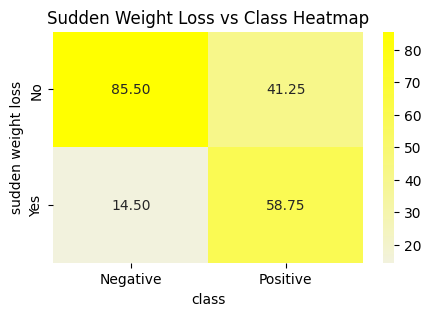

In [15]:
plt.figure(figsize=(5, 3))
qm = sns.light_palette("yellow", as_cmap=True)
sns.heatmap(pd.crosstab(Diabetes['sudden weight loss'], Diabetes['class'], normalize='columns') * 100, cmap=qm, annot=True, fmt=".2f")
plt.title("Sudden Weight Loss vs Class Heatmap")
plt.show()

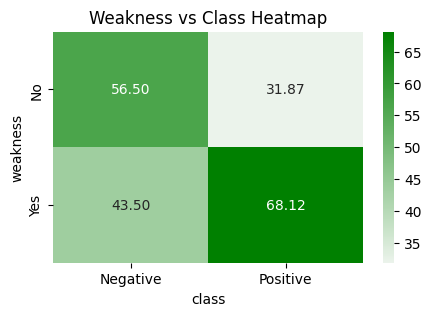

In [16]:
plt.figure(figsize=(5, 3))
sm = sns.light_palette("green", as_cmap=True)
sns.heatmap(pd.crosstab(Diabetes['weakness'], Diabetes['class'], normalize='columns') * 100, cmap=sm, annot=True, fmt=".2f")
plt.title("Weakness vs Class Heatmap")
plt.show()



In [17]:
eating = px.histogram(Diabetes, x = 'Polyphagia', color = 'class', title="Excessive eating")
eating.show()

In [19]:
plt.figure(figsize=(5, 3))
tm = sns.light_palette("red", as_cmap=True)
sns.heatmap(pd.crosstab(Diabetes['Polyphagia'], Diabetes['class'], normalize='columns') * 100, cmap=tm, annot=True, fmt=".2f")
plt.title("Polyphagia vs Class Heatmap")
plt.close()

gntlthrsh = px.histogram(Diabetes, x = 'Genital thrush',color='class')
gntlthrsh.show()

<function matplotlib.pyplot.show(close=None, block=None)>

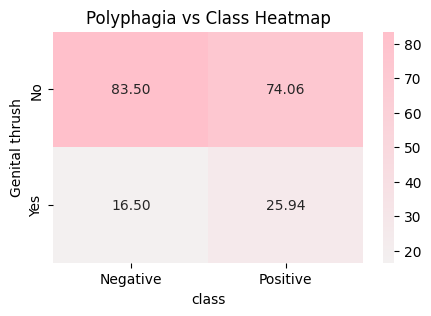

In [22]:
plt.figure(figsize=(5, 3))
um = sns.light_palette("pink", as_cmap=True)
sns.heatmap(pd.crosstab(Diabetes['Genital thrush'], Diabetes['class'], normalize='columns') * 100, cmap=um, annot=True, fmt=".2f")
plt.title("Polyphagia vs Class Heatmap")
#plt.savefig(f"{save_dir}/polyphagia_heatmap.png")
#plt.close()
plt.show